# Lab - TODO NAME Part 1 - GCP Setup
## E6692 Spring 2022


In this lab we will be training a [**YOLOv4-Tiny**](https://medium.com/analytics-vidhya/yolov4-vs-yolov4-tiny-97932b6ec8ec) model using the Darknet framework. The YOLOv4-Tiny model requires significantly more resources to train than the classification and regression models you have been working with in previous labs. To train in a reasonable amount of time, we will need to use a more powerful GPU than the TegraX1 on the Jetson Nano. 

This notebook will guide you through the setup of a Google Cloud Platform (GCP) virtual machine. GCP offers computing stacks that can be configured both in hardware and software. You will use it to set up a VM instance with a high computing capacity GPU to train YOLOv4-Tiny quickly on a large traffic image dataset.

## Step 1: Sign in to Google Cloud Account and Redeem Coupon

In a browser, navigate to [the GCP website](https://cloud.google.com/). If you don't have an account associated with __your Columbia UNI__, create one. If you sign up with a personal email, you will not be able to redeem the GCP coupons. If you're setting up an account for the first time, you will receive a $300 free coupon. 

Earlier in the semester you were given a coupon for an additional $100 coupon. Use this only if you need it. The link to the GCP coupon spreadsheet is [here](https://docs.google.com/spreadsheets/d/18Wc6nnrZq-nADsVzl0lkeQULeJ0qTEOLtrZHrs8xXhc/edit#gid=0). Find **your** coupon code and click the link to redeem the coupon on the same spreadsheet. Follow the instructions to redeem the coupon. 


## Step 2: Create GCP Project and Configure Billing Account

In the search bar, enter "new project" and click "Create a Project".

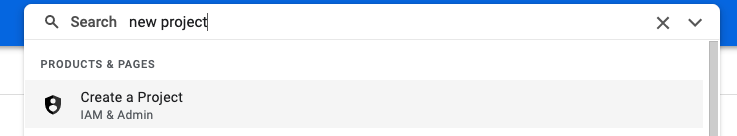

Enter a relevant project name. Under "Organization" and "Location" you should see "columbia.edu". Click "Create".

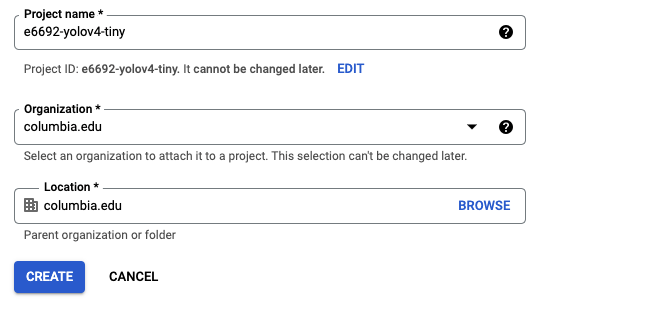

After creating the project, you should see this notification. Click "SELECT PROJECT".

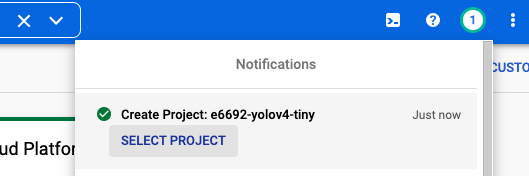

You should now see your project in the top bar:

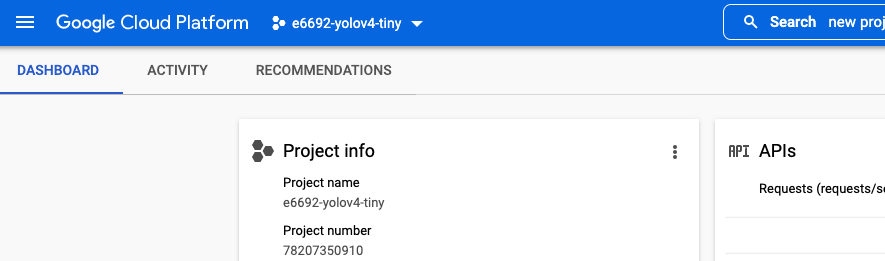

In the side bar options, go to "Billing" and the "Overview". In the free trail credit section click "UPGRADE". 

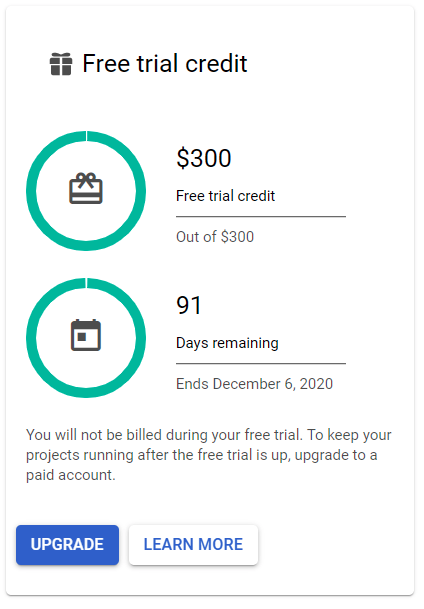

Then, navigate to "Compute Engine" and "VM instances"

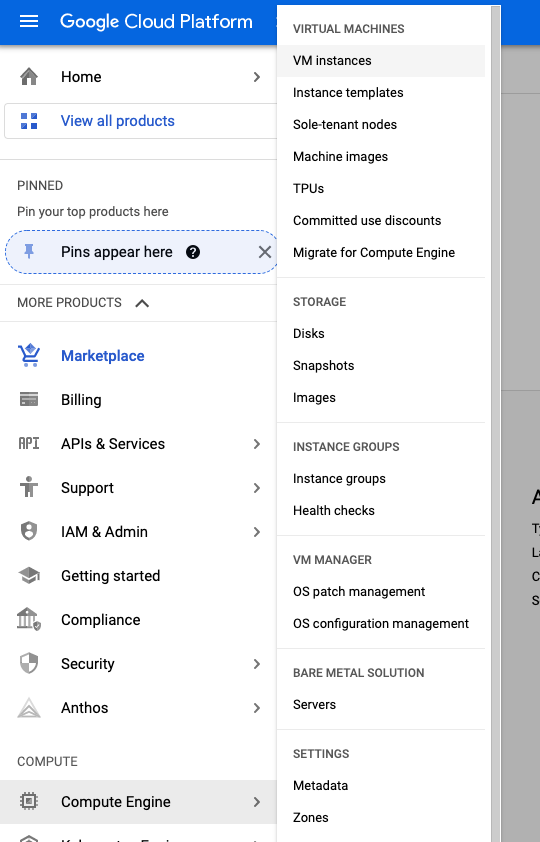

You should see the following screen:

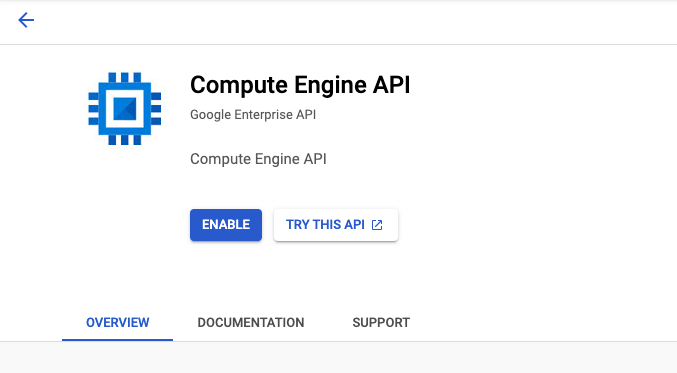

Click "ENABLE" to enable the Compute Engine API. It might take a couple minutes for this to complete. When it is enabled you will see the following:

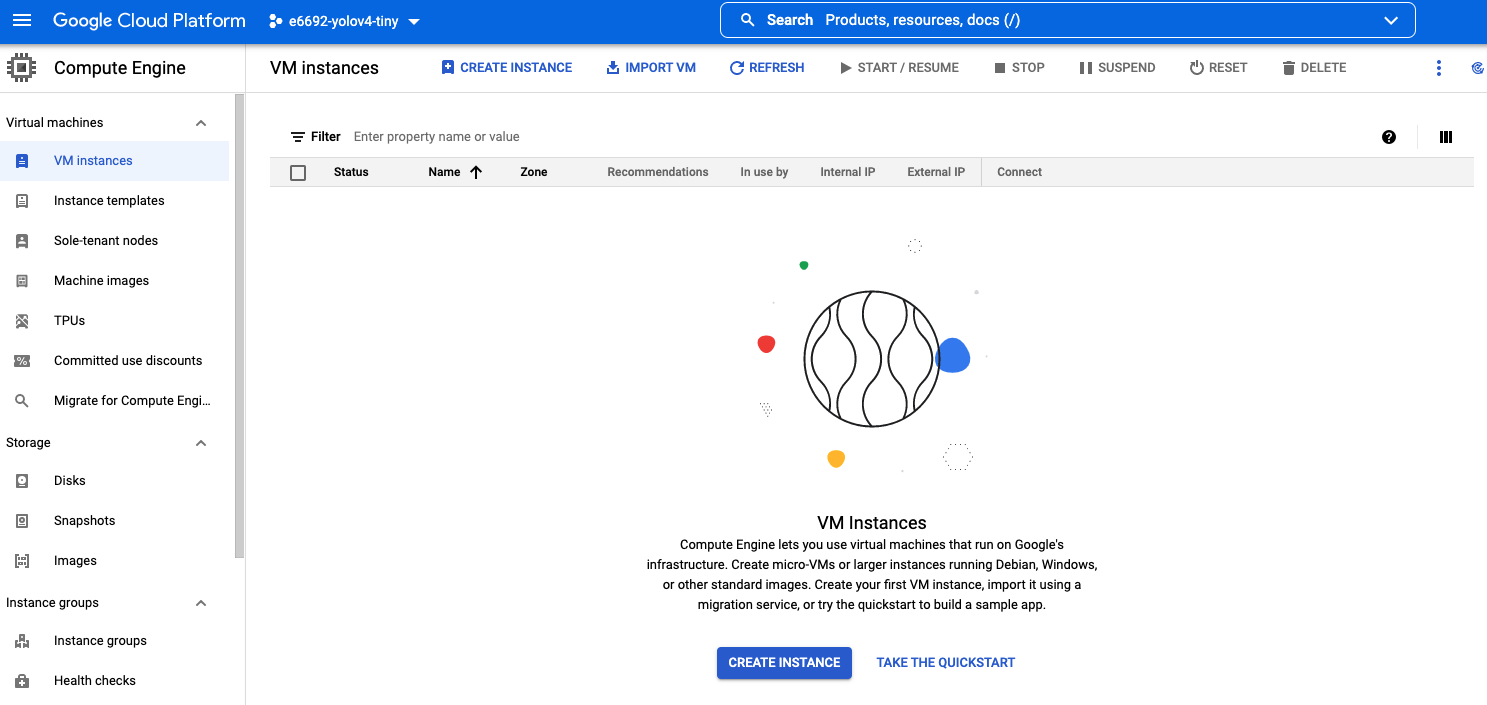

## Step 3: Increase the GPU Quota of Your Project

In order to use a datacenter GPU, you need to increase the GPU quota of your project.

With your new project selected and the Compute Engine API enabled, go to "IAM & Admin" and then "Quotas". 

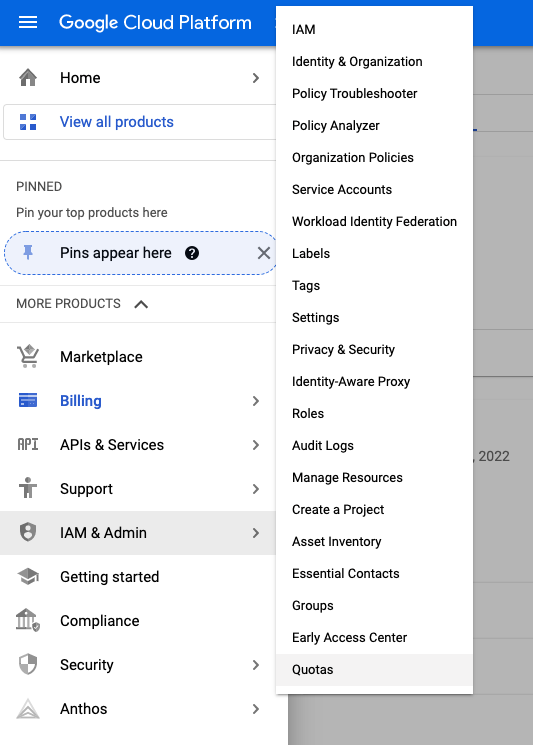

You should see a list of Quotas and Usage. In the search bar type "GPU". Before hitting enter, select "GPUS-ALL-REGIONS-per-project"

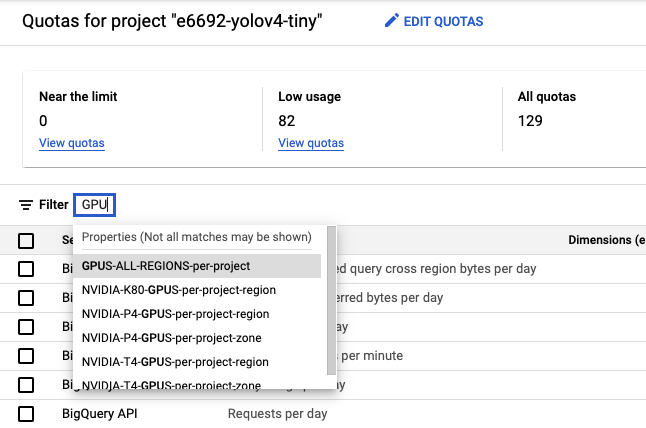

After selecting, it should look like this:

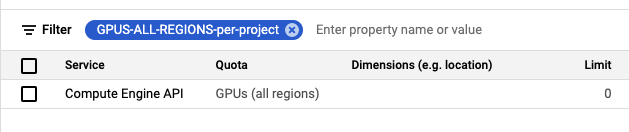

Select the checkbox next to "Compute Engine API" and then click "EDIT QUOTAS" in the top bar. In the popup window, enter "1" as the new limit. This is the number of GPUs you are requesting to use. GCP has to approve this change. In the request description enter something about needing a GPU for a deep learning course. Do not indicate that it is for personal use or your request will likely be denied. 

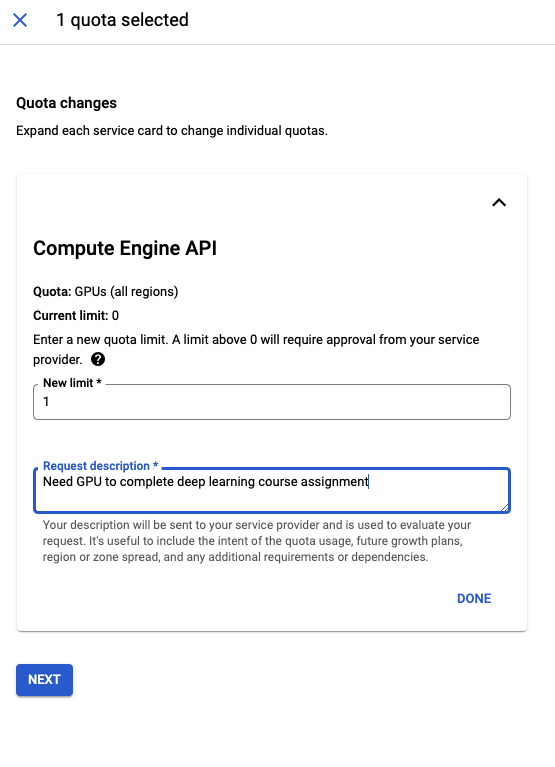

Click "NEXT" and enter your personal information. They will use this to contact you when the quota request has been approved (or denied). Submit the request. Go to your email and look for the quota request confirmation. It will look something like this:

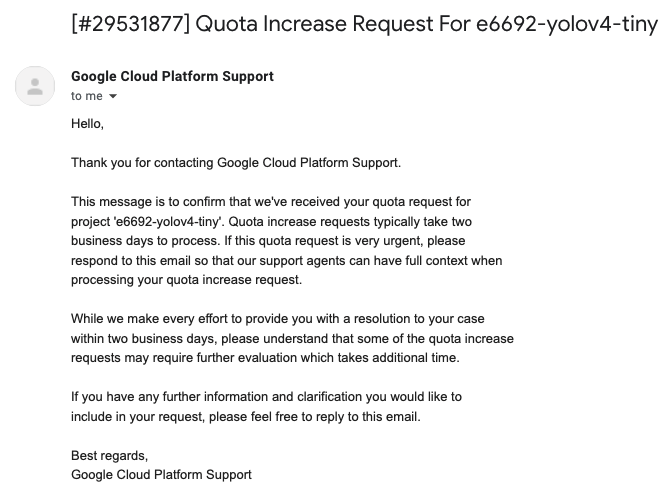

It probably will not take 2 days to process the request, but you should plan for it to take at least 2 days. It took approximately 3 minutes to get approved when making this tutorial. If, for some reason, you get denied, let us know and we can assist you. Confirmation email:

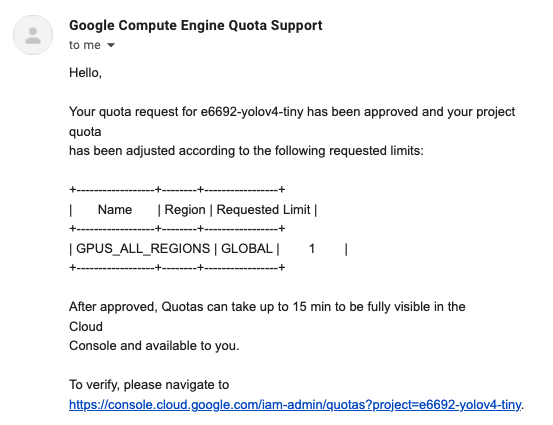

Navigate to the link they provide in the approval email to see the increased quota. Like the email says, it may take 15 minutes to see the changes in GCP, but ultimately it will look like this when the changes propagate: 

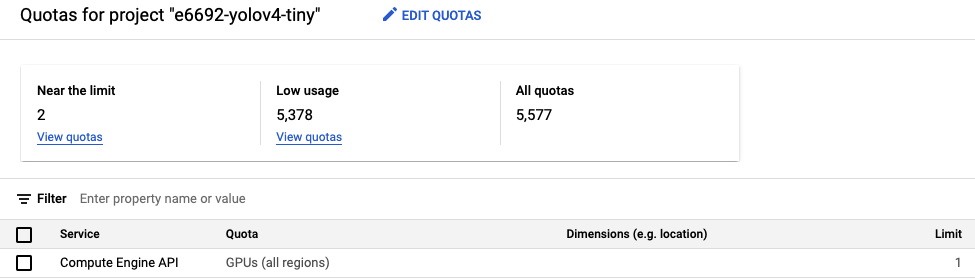


## Step 4: Create a VM Instance

Navigate to "Compute Engine" and "VM instances". In the top bar click "CREATE INSTANCE".

Name your instance something meaningful, select "GPU" as the machine family, and "NVIDIA Tesla T4" as the GPU type. You're welcome to experiment with different GPU types, but note that the billing rate can vary significantly depending on the GPU tier. See [this chart](https://cloud.google.com/compute/docs/gpus) for a breakdown of the available datacenter GPUs. You have $100 to complete this lab (unless you have the free trial coupon), so budget accordingly. It's important to be conscious of the rate your instance is consuming credits.

NOTE: you may have to adjust the region and zone of your VM depending on available resources. This part requires some trial and error to find an open configuration.

Under "Boot disk" click "CHANGE".

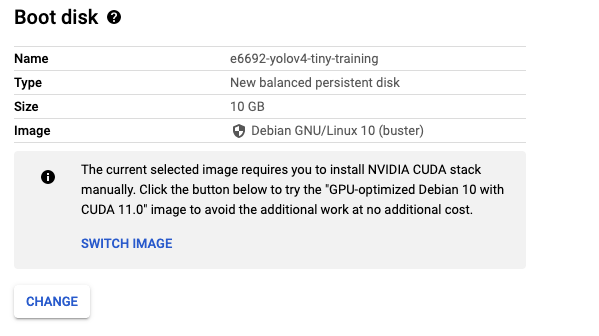

Choose the following boot disk configuration. This boot disk has PyTorch and CUDA preinstalled.

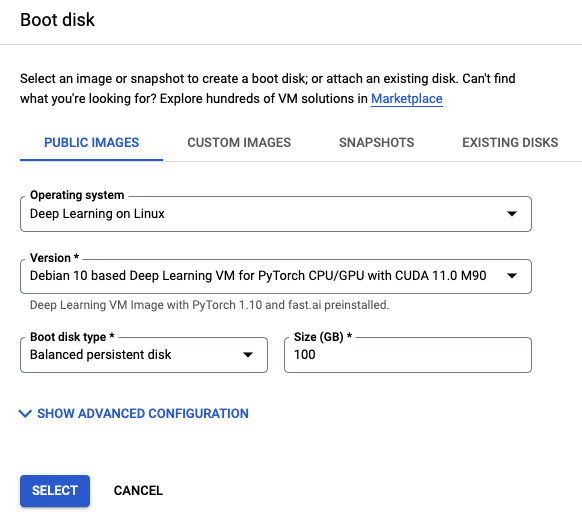

Under "Firewall", check both "Allow HTTP traffic" and "Allow HTTPS traffic". Then click "CREATE".

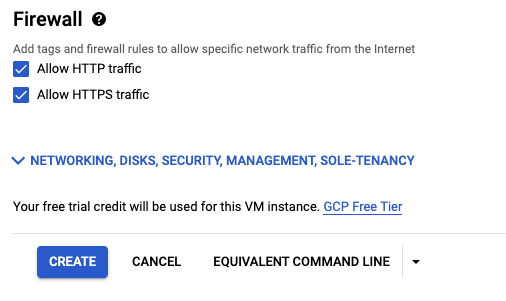

GCP will now attempt to create your instance. If you see the following notification, you will need to repeat Step 4 with a different region and zone configuration until you find one that is open. (Delete instance, start over.)

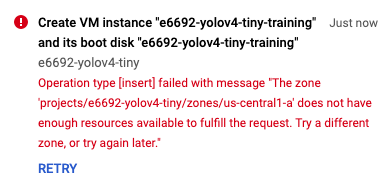

When your instance is created successfully, you will see this:

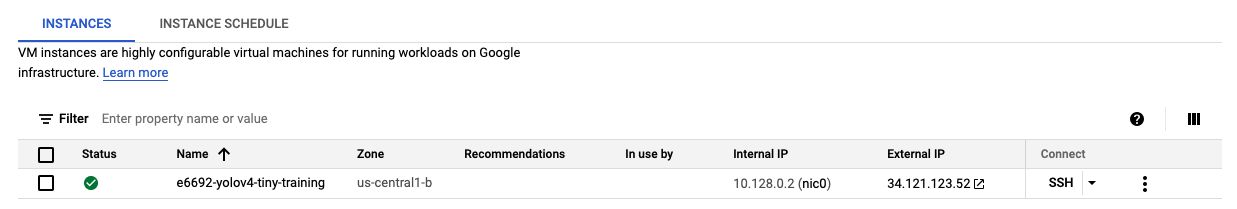

## Step 5: Connect to the VM Instance

To connect to the VM instance we will use SSH. This is nearly identical to how we interface with the Jetson Nano, so by now it should be a natural transition. We're considering two options for SSHing into the instance: the [gcloud CLI](https://cloud.google.com/sdk/gcloud) and the browser based SSH window. I highly recommend the gcloud CLI method, but it requires some additional setup. To install gcloud, visit the page in the link and follow the setup instructions. 

The browser SSH window is easy to use (but it kinda sucks). To use the browser SSH window click "SSH" under the "Connect" tab of your instance. It will open a new browser window with an SSH connection established.

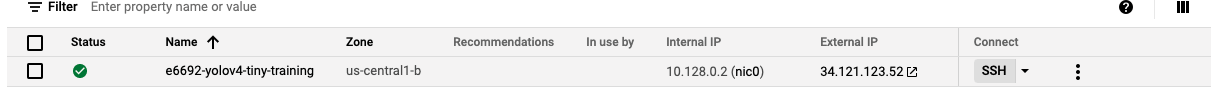

After installing the gcloud CLI (optional), get the gcloud SSH command by clicking the dropdown arrow and clicking "View gcloud command".

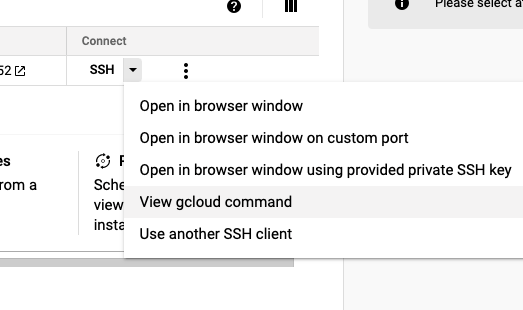

Copy the SSH command to the clipboard and execute it in a local terminal.

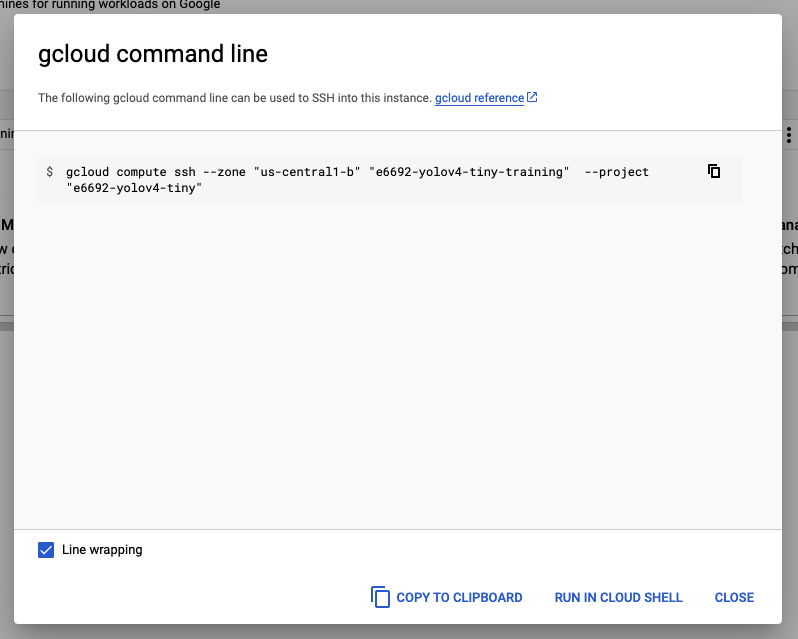

Both connection methods will show this upon successful connection:

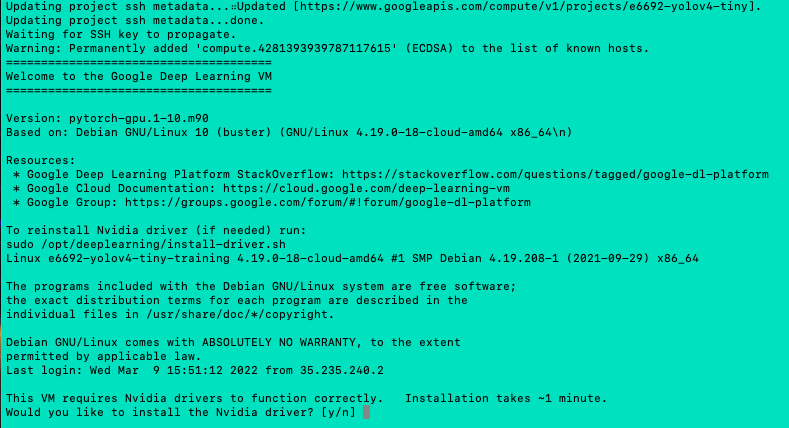

Install the NVIDIA driver (y). If this fails, you may need to restart the VM and try again. When the driver is installed successfully, enter `nvidia-smi`. You will see an output summary of the GPU hardware/software.

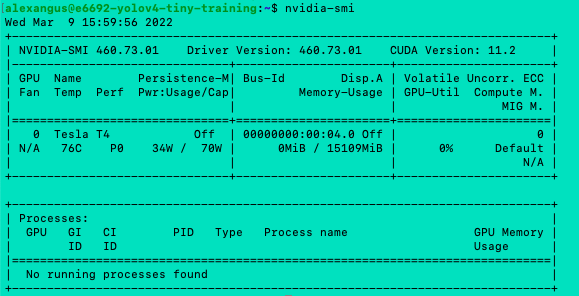 

You can also do an `import torch` in a Python shell to confirm that PyTorch is installed.

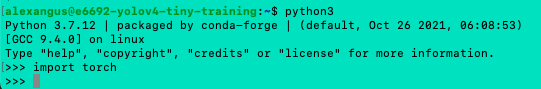

## Step 6: Connect to Jupyter Lab

In order to access the JupyterLab server, we need to create a firewall rule to allow signals to reach the instance. In the GCP console select "VPC network" and "Firewall".

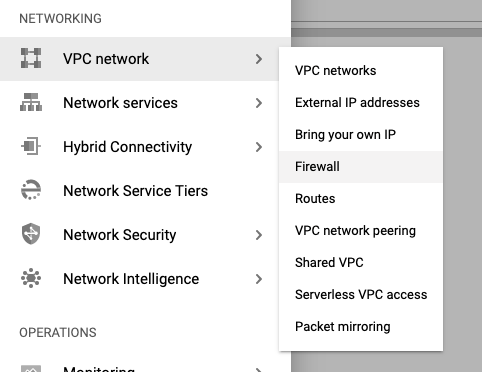

Click "CREATE FIREWALL RULE" 

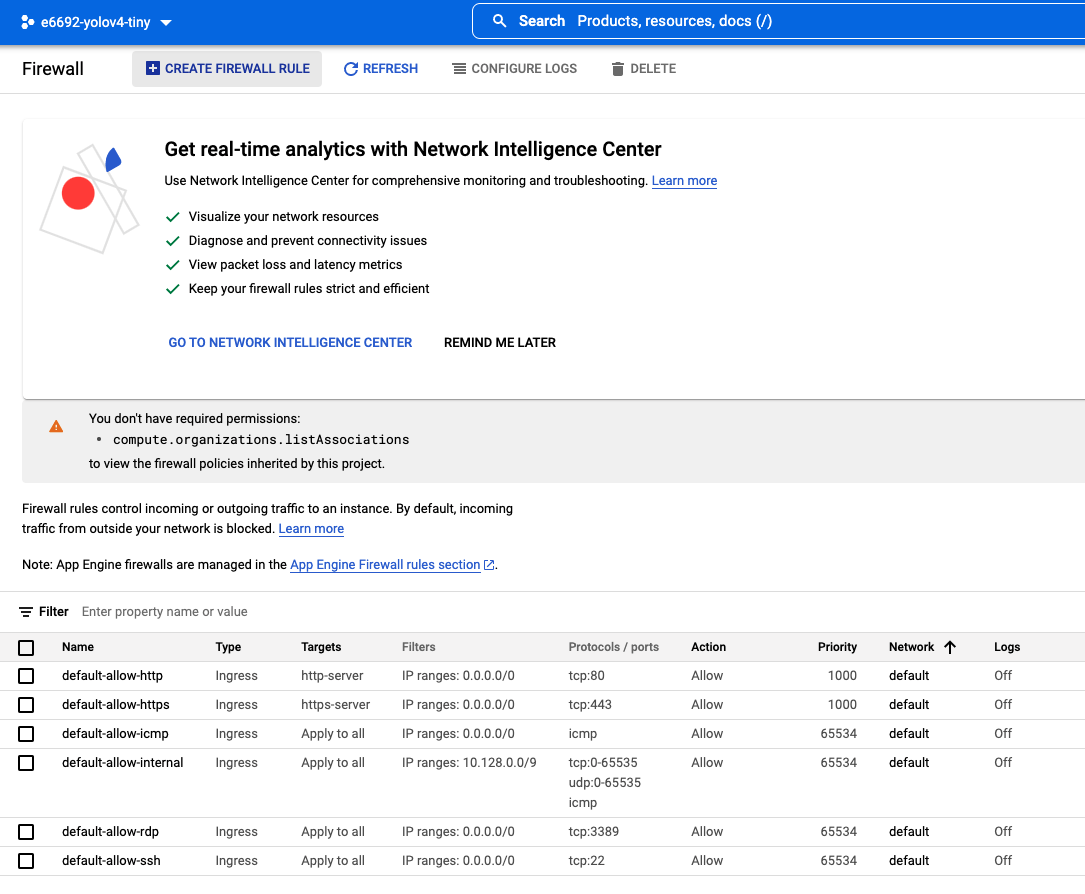

Enter a name for the firewall rule.

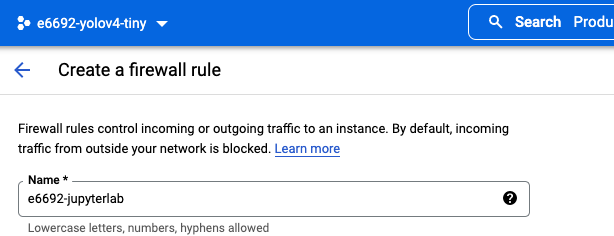

Under "Targets" select "All instances in the network" and under Source IPv4 ranges enter "0.0.0.0/0" to allow all IP addresses. (This is not secure, but we aren't dealing with anything sensitive)

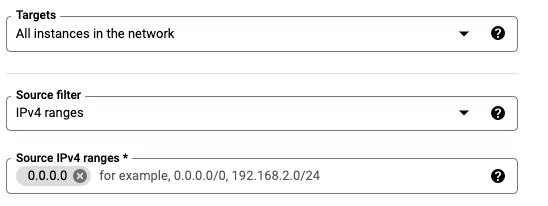

Under Protocols and ports click "tcp" and enter "8888". This allows us to access the JupyterLab server through port 8888. Click "CREATE".

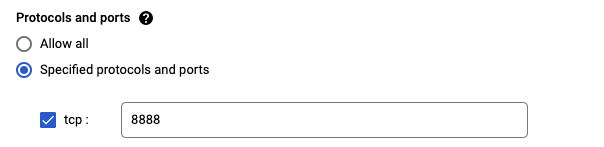

You may need to restart your instance to see the changes in the firewall rules. 

Back in the SSH terminal, enter `jupyter lab --allow-root --no-browser --ip 0.0.0.0 --port 8888`. You should see the JupyterLab server start. 

Now go back to the VM instances page of your project. You should see an IP address under "External IP". This is the outward facing IP address of the VM instance, and we will use it to connect to the JupyterLab server. Copy the External IP and paste it into your browser with the port 8888 appended: `ip_address:8888`.

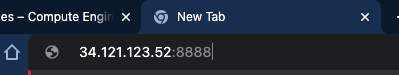

You should see this page. Take the token string from the ssh terminal and paste it in as the password. 

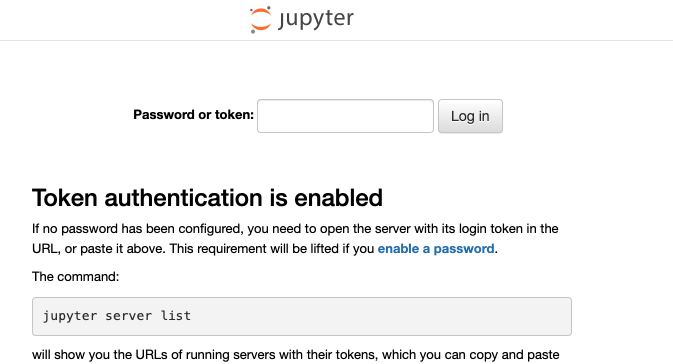

Once you see the JupyterLab interface, the setup is complete. You can now use JupyterLab exactly like you do on the Jetson Nano, but note that **we are not using a Docker container for the GCP portion of the lab.**




